<a href="https://colab.research.google.com/github/Vaishwik369/File-Sharing-Socket-Programming/blob/main/Thyroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Thyroid_Diff.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

(   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
 0   27      F      No         No              No        Euthyroid   
 1   34      F      No        Yes              No        Euthyroid   
 2   30      F      No         No              No        Euthyroid   
 3   62      F      No         No              No        Euthyroid   
 4   62      F      No         No              No        Euthyroid   
 
           Physical Examination Adenopathy       Pathology     Focality Risk  \
 0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
 1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
 2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
 3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
 4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   
 
      T   N   M Stage       Response Recurred  
 0  T1a  N0  M0     I  Indeterminate       No  


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Copy the data for preprocessing
df = data.copy()

# Encoding categorical variables using LabelEncoder
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Scale the 'Age' column (numerical feature)
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the preprocessed data and the shape of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train.head()


((306, 16),
 (77, 16),
 (306,),
 (77,),
           Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
 165 -0.057351       0        0           0                0                 2   
 321  1.398184       0        0           0                0                 2   
 220 -0.785118       0        0           0                0                 2   
 94  -0.255833       0        0           0                0                 2   
 232 -0.652797       0        0           0                0                 2   
 
      Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
 165                     1           3          3         0     2  2  0  0   
 321                     1           5          3         0     1  3  2  0   
 220                     1           3          3         1     2  2  1  0   
 94                      3           3          1         0     2  2  0  0   
 232                     3           2          3         1     1  2  2  0  

In [6]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7096 - loss: 0.6185 - val_accuracy: 0.7662 - val_loss: 0.4603
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7787 - loss: 0.4600 - val_accuracy: 0.8831 - val_loss: 0.3543
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8356 - loss: 0.3732 - val_accuracy: 0.8831 - val_loss: 0.2748
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8903 - loss: 0.2806 - val_accuracy: 0.9351 - val_loss: 0.2425
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8835 - loss: 0.2588 - val_accuracy: 0.8961 - val_loss: 0.2377
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9137 - loss: 0.1858 - val_accuracy: 0.9221 - val_loss: 0.2197
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8912 - loss: 0.2485 - val_accuracy: 0.9221 - val_loss: 0.2181
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9128 - loss: 0.2039 - val_accuracy: 0.9221 - val_loss: 0.2196
Ep

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9797 - loss: 0.0819 - val_accuracy: 0.9351 - val_loss: 0.1768
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9954 - loss: 0.0347 - val_accuracy: 0.9351 - val_loss: 0.1861
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9906 - loss: 0.0529 - val_accuracy: 0.9481 - val_loss: 0.1841
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9820 - loss: 0.0741 - val_accuracy: 0.9351 - val_loss: 0.2011
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9906 - loss: 0.0460 - val_accuracy: 0.9221 - val_loss: 0.2230
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9870 - loss: 0.0493 - val_accuracy: 0.9221 - val_loss: 0.1907
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9948 - loss: 0.0358 - val_accuracy: 0.9351 - val_loss: 0.1903
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9926 - loss: 0.0333 - val_accuracy: 0.9221 - val_

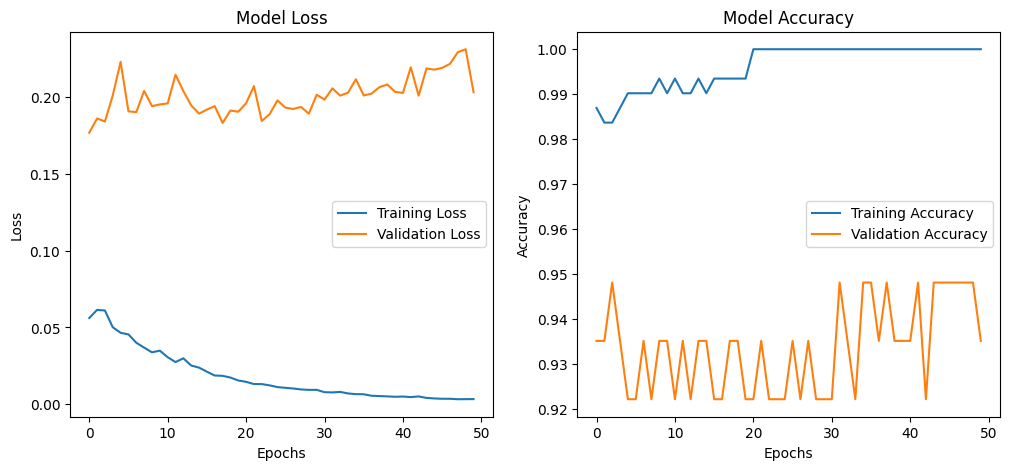

In [9]:
import matplotlib.pyplot as plt
# Train the model and save the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Plotting the training and validation loss
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the labels for test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Accuracy: 0.935064935064935
Precision: 0.8888888888888888
Recall: 0.8421052631578947
F1-Score: 0.8648648648648649
Confusion Matrix:
[[56  2]
 [ 3 16]]
